# TomTom Data Science assignement

In [7]:
pwd

'/home/julien/Documents/tomtom/dataset_tomtom'

In [1]:
import os

# Set working directory
work_dir = "/home/julien/Documents/tomtom/dataset_tomtom"
#os.getcwd()
os.chdir(work_dir)
os.getcwd()

'/home/julien/Documents/tomtom/dataset_tomtom'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset
#files = os.listdir(os.curdir)
file = "dataset.csv"
# Safety net for classic missing value labels
missing_values = ["n/a", "na", "--"]
imported_dat = pd.read_csv(file, na_values = missing_values)

# Isolate the labels in separate array
target = imported_dat['Label']

# Keep column of unknown data in imported array
full_dataset = imported_dat
imported_dat = imported_dat.iloc[:,0:11]
feature_list = list(imported_dat.columns)

## 1. Descriptive analysis of the dataset

In [10]:
# First touch
imported_dat.head(10)

,Fts_0,Fts_1,Fts_2,Fts_3,Fts_4,Fts_5,Fts_6,Fts_7,Fts_8,Fts_9,Fts_10
0,50,21,9.516114,77,0,28,0,0.35,27,48,22
1,55,0,11.495707,92,0,0,26,0.35,36,92,56
2,53,0,8.509515,82,0,52,-5,0.35,29,30,2
3,37,0,8.491525,76,0,28,18,0.35,40,48,8
4,37,0,8.501128,79,0,34,-26,0.35,43,46,2
5,85,0,12.512742,88,-4,6,1,0.35,3,83,80
6,56,0,11.484501,81,0,-4,11,0.35,25,86,62
7,55,-1,8.506949,95,-3,54,-4,0.35,40,41,2
8,53,8,11.509974,77,0,28,0,0.35,23,48,24
9,37,0,8.494062,101,-7,28,0,0.35,64,73,8


**At first glance, no categorical variable needing one-hot enconding. All looks quite continous**

In [11]:
# Get a feeling for unknown data
imported_dat.describe()

,Fts_0,Fts_1,Fts_2,Fts_3,Fts_4,Fts_5,Fts_6,Fts_7,Fts_8,Fts_9,Fts_10
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,48.249747,-0.205126,9.200491,85.341563,0.262736,34.528782,1.298276,6.352874,37.074552,50.899862,13.964598
std,12.252618,78.142770,1.354741,8.908602,41.004131,21.703409,179.486760,5.480359,13.135557,21.463250,25.648404
min,27.000000,-4821.000000,8.458566,21.000000,-3939.000000,-188.000000,-13839.000000,0.300000,-48.000000,-353.000000,-356.000000
25%,38.000000,0.000000,8.495225,79.000000,0.000000,26.000000,-5.000000,0.350000,31.000000,37.000000,0.000000
50%,45.000000,0.000000,8.503458,83.000000,0.000000,42.000000,0.000000,10.000000,39.000000,44.000000,2.000000
75%,55.000000,0.000000,8.516995,89.000000,0.000000,46.000000,5.000000,12.000000,42.000000,60.000000,14.000000
max,126.000000,5075.000000,14.521121,149.000000,3830.000000,436.000000,13148.000000,12.000000,105.000000,270.000000,266.000000


### Target analysis
**1.1 Let's first look at _the labels to predict_ (i.e., target) to get an idea of the type of model most likely to have a good fit**

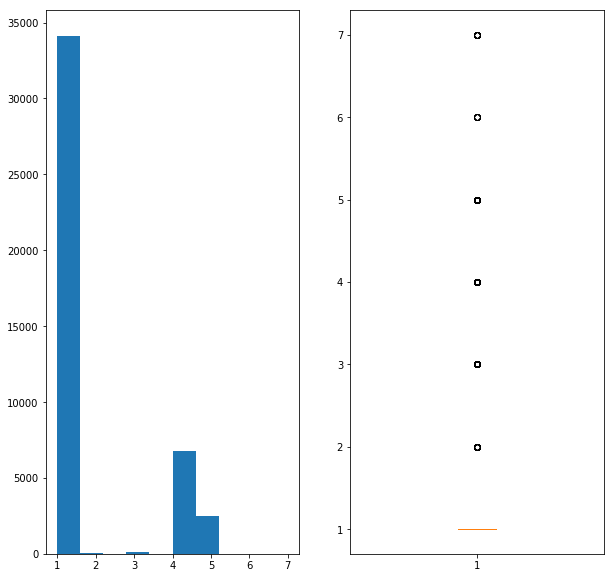

In [176]:
# Get an idea of the labels to predict so as to start thinking of the right model to use for prediction
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

for i in range(2):
        ax = axes[i]
        if i == 0:
            ax.hist(target)
        else:
            ax.boxplot(target)

In [177]:
# Get actual counts to get an idea of low count values
from collections import Counter
import math
Counter(target)

Counter({2: 37, 4: 6748, 1: 34108, 5: 2458, 3: 132, 7: 11, 6: 6})

In [178]:
target.describe()

count    43500.000000
mean         1.700529
std          1.354648
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          7.000000
Name: Label, dtype: float64

In [179]:
target.median()

1.0

In [288]:
#Now get a feeling for how balanced the target is 
target_counts = target.value_counts()

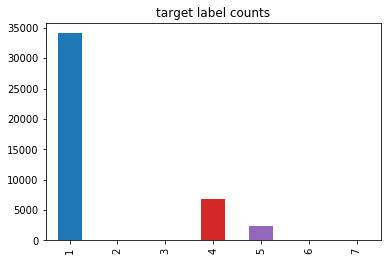

In [289]:
# display the count for each label
target_counts.sort_index().plot(kind='bar',title='target label counts');

<div class="alert alert-block alert-info">
<b>Intermediate Conclusion on target data:</b> <br> The distribution is quite skewed, and strongly bimodal. <br>
Differences in mean and median & histogram suggest non normal distribution. <br>
Quick label count of the target suggest that the target data is not well balanced, with an overwhelming majority of 1 labels. __Not optimal situation__
</div>

**1.2 Now let's look at the data we can use for our model**

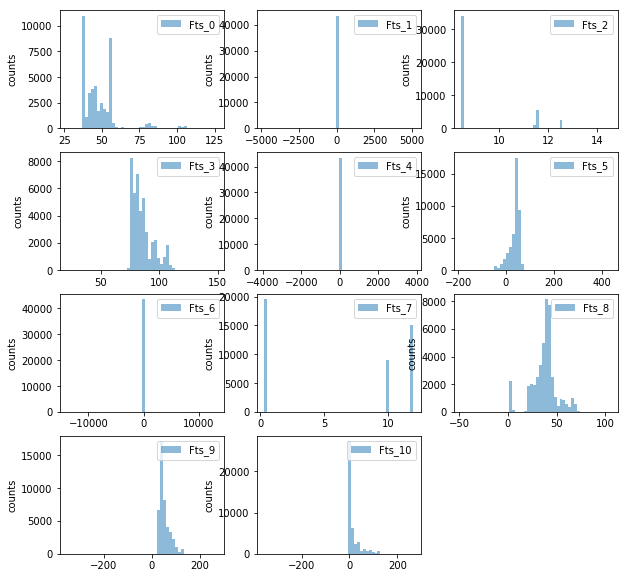

In [12]:
# First, hist the data to get an idea of distributions we are dealing with

ncols = 3
nrows = int(np.ceil(len(imported_dat.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
nbins = 50
counter = 0
# Counter to remove unwanted subplots
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        
        # Plot when we have columns left to plot
        if counter < len(imported_dat.columns):
            ax.hist(imported_dat[imported_dat.columns[counter]], bins=nbins,  alpha=0.5, label='{}'.format(imported_dat.columns[counter]))
            ax.set_ylabel('counts')
            leg = ax.legend(loc='upper right')
        # Remove axis when we no longer have columns to plot
        else:
            ax.set_axis_off()

        counter += 1

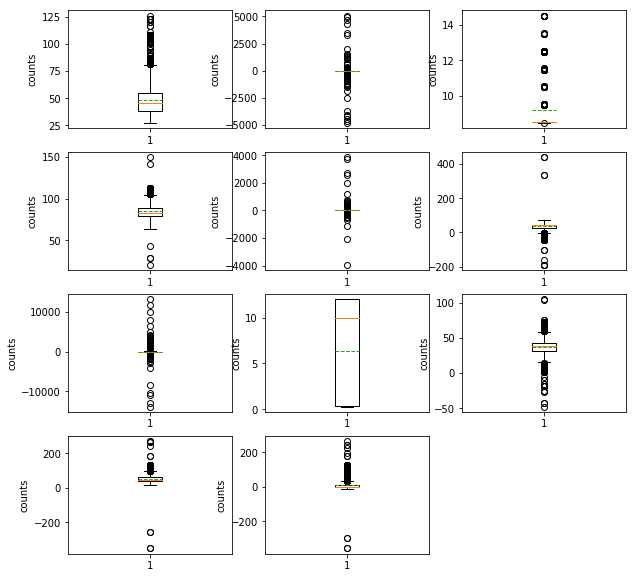

In [13]:
# I like to boxplot the data to get an idea of outliers and IQRs
# In this case, hists of data vectors such as Fts_1 are not very informative
# Copy paste of cell above to boxplot the columns
ncols = 3
nrows = int(np.ceil(len(imported_dat.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        
        # Plot when we have columns left
        if counter < len(imported_dat.columns):
            # bootstraping might not be important here but I find it often to increase safety in statistical analysis
            ax.boxplot(imported_dat[imported_dat.columns[counter]], bootstrap = 1000,showmeans = True, meanline = True)
            ax.set_ylabel('counts')
        # Remove axis when we no longer have columns to plot
        else:
            ax.set_axis_off()

        counter += 1

<div class="alert alert-block alert-info">
<b>Intermediate Conclusion on vector data:</b> <br> Distributions show high peaks of data. <br>
Based on hist & boxplot, vectors of potential interest for modeling are Fts0, Fts3, Fts5, Fts8, Fts9. <br>
Fts_2 & Fts_7 will might show high correlation with target due to bimodality
</div>

**1.3 Explore relation between target and data vectors** 

In [184]:
# Display pairwise Pearson correlation (given the high sample size, I allow Pearson, 
# but consider Spearman given the non normality) with target
# compute all pair wise correlations
pairwise_corr = full_dataset.corr()
pairwise_corr

,Fts_0,Fts_1,Fts_2,Fts_3,Fts_4,Fts_5,Fts_6,Fts_7,Fts_8,Fts_9,Fts_10,Label
Fts_0,1.000000,0.066365,0.737645,0.262622,-0.007774,-0.051460,0.007306,-0.008148,-0.757307,0.168417,0.526896,0.737641
Fts_1,0.066365,1.000000,-0.003946,-0.013422,-0.001609,0.000373,-0.001826,-0.003118,-0.070628,-0.005827,0.031235,-0.003978
Fts_2,0.737645,-0.003946,1.000000,0.145252,-0.003148,-0.430642,0.000742,-0.006220,-0.593947,0.505181,0.722684,0.999973
Fts_3,0.262622,-0.013422,0.145252,1.000000,0.042157,0.255181,-0.002909,-0.001934,0.430019,0.155282,-0.091279,0.145267
Fts_4,-0.007774,-0.001609,-0.003148,0.042157,1.000000,-0.004767,0.008286,0.006964,0.036169,0.022352,0.000410,-0.003180
Fts_5,-0.051460,0.000373,-0.430642,0.255181,-0.004767,1.000000,0.103159,0.000758,0.221277,-0.914963,-0.875212,-0.430602
Fts_6,0.007306,-0.001826,0.000742,-0.002909,0.008286,0.103159,1.000000,-0.005161,-0.008569,-0.105569,-0.083378,0.000707
Fts_7,-0.008148,-0.003118,-0.006220,-0.001934,0.006964,0.000758,-0.005161,1.000000,0.006142,-0.001771,-0.004479,-0.006164
Fts_8,-0.757307,-0.070628,-0.593947,0.430019,0.036169,0.221277,-0.008569,0.006142,1.000000,-0.053010,-0.555205,-0.593932
Fts_9,0.168417,-0.005827,0.505181,0.155282,0.022352,-0.914963,-0.105569,-0.001771,-0.053010,1.000000,0.859527,0.505146


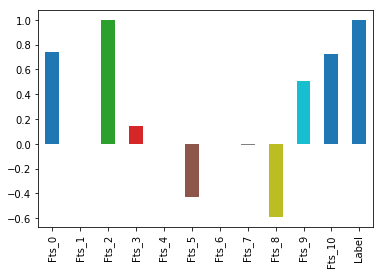

In [185]:
# display correlation coeff for each data feature
pairwise_corr['Label'].plot(kind='bar');

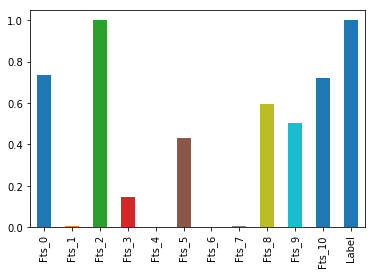

In [186]:
# Want to get a feeling for high correlation coeff, so take absolute values
corr_coeff_abs = abs(pairwise_corr['Label'])
# Rename columns to avoid future conflict
corr_coeff_abs.rename(columns={"Label": "Absolute_Label"}, inplace = True)
corr_coeff_abs.plot(kind='bar')

**Fts_2 has a high correlation coeff, but so high that it is suspicious. Maybe due to bimodal nature of the distribution** <br>
**Promising data might be Fts_0 & Fts_10, although Fts_10 has a large pick at 0 which might explain the correlation** <br>

In [187]:
# Let's explore the relation with Fts_2 a bit more
curr_dat = full_dataset['Fts_2']
curr_dat = pd.concat([curr_dat.round(decimals = 0),full_dataset['Label']], axis=1)
curr_dat.head(20)

,Fts_2,Label
0,10.0,2
1,11.0,4
2,9.0,1
3,8.0,1
4,9.0,1
5,13.0,5
6,11.0,4
7,9.0,1
8,12.0,4
9,8.0,1


**Fts_2 is continous data, but there seems to be a strong relation between Fts_2 and the labels in the target** <br>
**Relation seems deterministic**

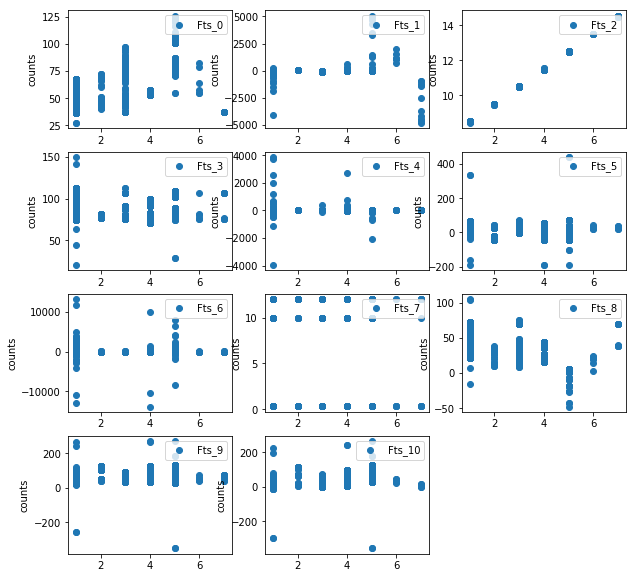

In [188]:
# As a last visualization check, scatter the features vs target to visualize the corr_coeff
ncols = 3
nrows = int(np.ceil(len(imported_dat.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        
        # Plot when we have columns left
        if counter < len(imported_dat.columns):
            # bootstraping might not be important here but I find it often to increase safety in statistical analysis
            ax.scatter(target, imported_dat[imported_dat.columns[counter]])
            ax.set_ylabel('counts')
            leg = ax.legend(loc='upper right')
        # Remove axis when we no longer have columns to plot
        else:
            ax.set_axis_off()

        counter += 1

<div class="alert alert-block alert-info">
<b>Intermediate Conclusion on relation between target & vector data:</b> <br> Hich corr_coeff with Fts_2 suggest that the labels in the target data might have been generated based on Fts_2 values <br>    
Based on corr_coeff, interesting vectors for modeling might be Fts_0, Fts_8 & Fts_10. Fts_10 high corr_coeff is probably due to low variance in data distribution across labels. <br>
Hence, I would focus on Fts_0, Fts_1 and Fts_8 for predictive power. <br>
</div>

<div class="alert alert-block alert-warning">
<b>There is an U-shape (inverted for Fts_0 & 1) which suggest that linear approaches might be weak in predicting the data when using these features.<b>
</div>

**1.3 Missing data points?** 

In [306]:
# Look for missing data points in the dataset
# Screening of classic missint data points labels was integrated in import data code
full_dataset.isnull().sum()

Fts_0     0
Fts_1     0
Fts_2     0
Fts_3     0
Fts_4     0
Fts_5     0
Fts_6     0
Fts_7     0
Fts_8     0
Fts_9     0
Fts_10    0
Label     0
dtype: int64

**No missing data points. That is good.**

## 2. Predictive analysis with a proper validation process.

### 2.1. Predictive analysis

In [189]:
# Relook at raw data
imported_dat.head(10)

,Fts_0,Fts_1,Fts_2,Fts_3,Fts_4,Fts_5,Fts_6,Fts_7,Fts_8,Fts_9,Fts_10
0,50,21,9.516114,77,0,28,0,0.35,27,48,22
1,55,0,11.495707,92,0,0,26,0.35,36,92,56
2,53,0,8.509515,82,0,52,-5,0.35,29,30,2
3,37,0,8.491525,76,0,28,18,0.35,40,48,8
4,37,0,8.501128,79,0,34,-26,0.35,43,46,2
5,85,0,12.512742,88,-4,6,1,0.35,3,83,80
6,56,0,11.484501,81,0,-4,11,0.35,25,86,62
7,55,-1,8.506949,95,-3,54,-4,0.35,40,41,2
8,53,8,11.509974,77,0,28,0,0.35,23,48,24
9,37,0,8.494062,101,-7,28,0,0.35,64,73,8


**While regression typically aims at predicting continous outcomes, not the case of our target here, I still want to get an idea at how well a linea approach would fit the data**

### 2.1.1. Linear model

In [190]:
## Note: The target is categorical. Regressions do not apply, but I'll do it for model comparison purposes
## Given the dataset, I'm going to focus on Fts_0, Fts_1 & Fts_8 for predictions

Fts_0
Coefficients: 
 [0.08127044]
Mean squared error: 0.83
Variance score: 0.54
Variance score: -14.84
Fts_8
Coefficients: 
 [-0.06110829]
Mean squared error: 1.17
Variance score: 0.35
Variance score: -7.61
Fts_10
Coefficients: 
 [0.03817821]
Mean squared error: 0.85
Variance score: 0.53
Variance score: -0.15


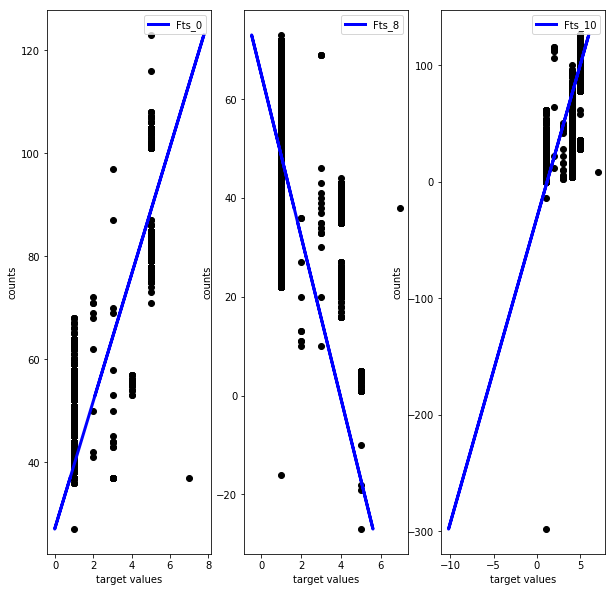

In [12]:
# Import estimator class
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

feature_to_use = ['Fts_0','Fts_8','Fts_10']
#select columns of interest
data  = full_dataset.loc[:,feature_to_use]
#reload target in case operations were run on the array in previous cells
target = full_dataset['Label']
#compute number of rows based on number of columns inputed
ncols = 3
nrows = int(np.ceil(len(data.columns) / (1.0*ncols)))
#prepare subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10), squeeze=False)
       
coefficients = []
for ndat in range(len(data.columns)):
    feature = data.loc[:,feature_to_use[ndat]]
    # Split the data and the target into training/testing sets ; 70/30 
    data_train, data_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

    # Initialize estimator model with specific parameters
    reg = LinearRegression(normalize=True)

    # I sometimes get a memory error. Code below non-randomly down-samples the data
    #data_train   = data_train[0:100000]
    #target_train = target_train[0:100000]
    #data_test    = data_test[0:100000]
    #target_test  = target_test[0:100000]

    # Prepare the data for model fit
    data_train = pd.Series(data_train).values
    data_train = np.expand_dims(data_train, axis=1)

    # Train the model using the training set
    reg.fit(data_train, target_train)

    # Prepare test data
    target_test = pd.Series(target_test).values
    target_test = np.expand_dims(target_test, axis=1)
    data_test = pd.Series(data_test).values
    data_test = np.expand_dims(data_test, axis=1)

    # Predict output for testing set
    data_pred = reg.predict(data_test)
    reg
    
    # Index subplot
    ax = axes[0][ndat]

    # Plot
    ax.scatter(target_test, data_test, color='black')
    ax.plot(data_pred, data_test, color='blue', linewidth=3, label = feature_to_use[ndat])
    ax.set_ylabel('counts')
    ax.set_xlabel('target values')
    leg = ax.legend(loc='upper right')
    # Print current feature
    print(feature_to_use[ndat])
    # Print coefficients
    print('Coefficients: \n', reg.coef_)
    # Print mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(target_test, data_pred))
    # Explained variance score
    print('Variance score: %.2f' % r2_score(target_test, data_pred))
    print('Variance score: %.2f' % reg.score(target_test, data_pred))
    
    # Store the estimated coefficients
    coefficients.append(reg.coef_)

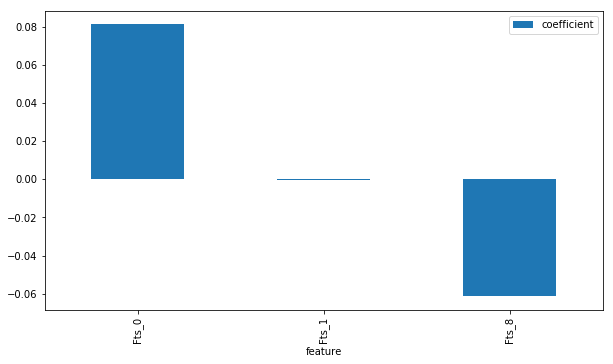

In [7]:
# From list to np array
coefficients = np.asarray(coefficients)
# concatenate within the array
coefficients = np.concatenate(coefficients)
# plot the estimated coefficients
feature_coef = pd.DataFrame(list(zip(feature_to_use, coefficients)), columns =['feature', 'coefficient'])
feature_coef
feature_coef.set_index('feature').plot(kind='bar', figsize=(10.0, 5.5))

<div class="alert alert-block alert-info">
<b> Intermediate observations on the linear fit:</b> <br> The linear fit does relatively okay for the first labels of the target, but overpredicts for label 4 6 & 7. That was already expected based on the earlier scatter plot<br>
However, scores are quite poor... <br>
Given the U shaped distribution, isotonic regression won't work either <br>
In any case, given the categorical nature of the target, classifier or decision tress would do better

<div class="alert alert-block alert-warning">
<b>Let's try something else.<b> <br>
We could try a SVM classifier, but that would be for predicting dichotomous data. <br>
Let's try a random forest algorithm, and consider neural networks for final blow.
</div>

### 2.1.2. Classifier

In [25]:
# Random forest regressor
# Define data to be used to predict
feature_to_use = 'Fts_0'
feature = imported_dat[feature_to_use]
target = full_dataset['Label']
# Prepare data for model
feature = np.array(feature)
target  = np.array(target)
feature = np.expand_dims(feature, axis=1)
target = np.expand_dims(target, axis=1)
target.shape

(43500, 1)

In [27]:
# Split train & test for data and target
data_train, data_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

print('Training Features Shape:', data_train.shape)
print('Training Labels Shape:', target_train.shape)
print('Testing Features Shape:', data_test.shape)
print('Testing Labels Shape:', target_test.shape)

Training Features Shape: (34800, 1)
Training Labels Shape: (34800, 1)
Testing Features Shape: (8700, 1)
Testing Labels Shape: (8700, 1)


In [28]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

# Train the model on training data
rf.fit(data_train, target_train)

/home/julien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [29]:
# Use the forest's predict method on the test data
predictions = rf.predict(data_test)

# Calculate the absolute errors
errors = abs(predictions - target_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', np.mean(errors), 'label.')

Mean Absolute Error: 1.109517141976214 label.


In [21]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / target_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 31.97 %.


In [30]:
# Now let's compare to the linear model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# create 5-Fold iterator with shuffle
cv = KFold(n_splits=5, shuffle=True)

In [31]:
# compute the cross-validated score for the LinearRegression
lr_scores = cross_val_score(LinearRegression(), feature, target, cv=cv)

print("cv scores: {}".format(lr_scores))

cv scores: [0.5446988  0.54170288 0.53147252 0.54434485 0.55730821]


In [32]:
# compute the cross-validated score for the RandomForestRegressor
rf_scores = cross_val_score(RandomForestRegressor(), feature, target, cv=cv)

print("cv scores: {}".format(rf_scores))

/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), f

cv scores: [0.80824074 0.81372379 0.80079421 0.80653979 0.80134593]


/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/julien/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


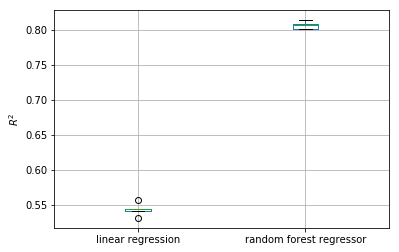

In [33]:
results = pd.DataFrame([lr_scores, rf_scores], 
                       index=['linear regression', 'random forest regressor'],
                       columns = ["split_{}".format(k) for k in range(cv.n_splits)]).T
ax = results.boxplot()
ax.set_ylabel('$R^2$');